<h3 style=>-- Model Building Random Forest --</h3>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Load the Cleaned Data

In [50]:
data = pd.read_csv(r"C:\Users\Gebruiker\Desktop\IronHack\Projects\Online Payments Fraud Detection\cleaned_fraud_dataset.csv")

In [51]:
data.drop(columns=['step', 'isFlaggedFraud'], inplace=True)

In [52]:
df = data.copy()

Define Features & Target

In [5]:
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Make predictions

In [8]:
y_pred = model.predict(X_test)

Evaluate the model

In [9]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

[[1270852      52]
 [    332    1288]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.80      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



Plot the heatmap

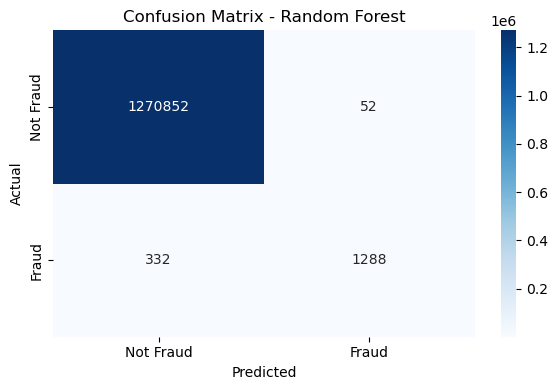

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['Not Fraud', 'Fraud']

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

In [11]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

***Conclusions:***

- 1270881 - true negative - not fraud
- 23
- accuracity 1.00 - the model performs really good on the full dataset - it could be misleading with imbalanced data
- Class 0 (majority) - almost perfect
- Class 1 (minority):
+ Precision: 0.98 -> Only 2% of predicted positives are false.

+ Recall: 0.80 -> 20% of actual positives are missed.

-> F1-Score: 0.88 -> Strong overall balance between precision and recall - means 328 out of 1,620 actual positives were missed. -> depends on the case im may or may not be acceptable
=> 20% is missing of the minority class - for fraud it is needed to catch all positives

* Re-run just the top cell to import the necessary libraries and load the dataset.

Define Features & Target

In [53]:
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

Train-Split Test

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Apply SMOTE only to training data

In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Train model on the re-sampled data

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

Predict on test set

In [57]:
y_pred_baseline = rf_baseline.predict(X_test)

Evaluate

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

print("Model Performance:")
print(confusion_matrix(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))

Model Performance:
[[1587482    1120]
 [     66    1987]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.64      0.97      0.77      2053

    accuracy                           1.00   1590655
   macro avg       0.82      0.98      0.88   1590655
weighted avg       1.00      1.00      1.00   1590655



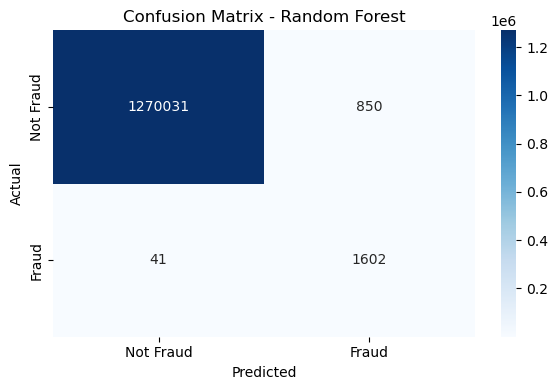

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['Not Fraud', 'Fraud']

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

In [60]:
import joblib
joblib.dump(model, 'random_forest_model_smote_correct.pkl')

['random_forest_model_smote_correct.pkl']

***Conclusions:***
- Recall 95% the model got amost all the minority cases
- Precision 68% - there are some false positive
- Class 0 - not fraud (majority) almost perfect

** the model is strong and SMOTE helped the model to detect the minority class better**

- Class 1 - fraud - needs to be verified since the model's success is juged by how well it finds it 


<h3 style=>-- Hybrid Sampling --</h3>

** Re-run just the top cell to import the necessary libraries and load the dataset.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


Train-Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Apply SMOTETomek

In [41]:
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


Train The Random Forest

In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

Make predictions

In [43]:
y_pred = rf_model.predict(X_test)


Evaluate the performance

In [45]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1270031     850]
 [     41    1602]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.65      0.98      0.78      1643

    accuracy                           1.00   1272524
   macro avg       0.83      0.99      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy Score: 0.9992998167421597


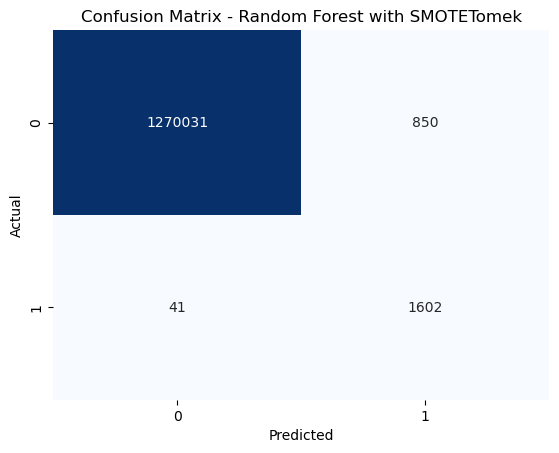

In [47]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest with SMOTETomek')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
import joblib
joblib.dump(model, 'random_forest_model SMOTETomek.pkl')

['random_forest_model SMOTETomek.pkl']

-----------------------------------------------------------------------------------------------------------------

***Tune Hyperparameters**
the RandomizedSearchCV (as detailed earlier) to:

Potentially improve precision without losing recall

Fine-tune tree depth, split criteria, and feature selection

This could push your F1-score for class 1 even higher.

** split/test/SMOTE was done as base**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score


Define hyperparameter 

In [44]:
param_dist = { 
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'class_weight': ['balanced']
}


Define the model and scorer

In [45]:
from sklearn.metrics import make_scorer, f1_score
rf = RandomForestClassifier(random_state=42)

# Focus on F1-score for the minority class (class 1)
scorer = make_scorer(f1_score, pos_label=1)

Create and run RandomizedSearchCV

In [48]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,        # 10 combinations max
    scoring=scorer,   # f1-score or your chosen metric
    cv=3,
    verbose=2,
    n_jobs=1,
    random_state=42
)


Run search on the SMOTE-resampled training data

In [49]:
random_search.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=19.7min
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=20.4min
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=21.1min
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=41.6min
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=51.2min



KeyboardInterrupt



Sample 10% of SMOTE-resampled data

In [50]:
X_sample = X_resampled.sample(frac=0.1, random_state=42)
y_sample = y_resampled.loc[X_sample.index]

In [51]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,           
    scoring=scorer,
    cv=3,
    verbose=2,
    n_jobs=1,
    random_state=42
)

random_search.fit(X_sample, y_sample)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.3min
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.3min
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.2min
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.5min
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.3min
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.3min
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=1,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': [10, 20],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict', pos_label=1),
                   verbose=2)

The best model to evaluate

In [52]:
best_rf = random_search.best_estimator_

# Predict on real (unseen) test data
y_pred = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Best Parameters:")
print(random_search.best_params_)

print("\n Evaluation on Test Data:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters:
{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced'}

 Evaluation on Test Data:
[[1583793    4809]
 [     44    2009]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.29      0.98      0.45      2053

    accuracy                           1.00   1590655
   macro avg       0.65      0.99      0.73   1590655
weighted avg       1.00      1.00      1.00   1590655



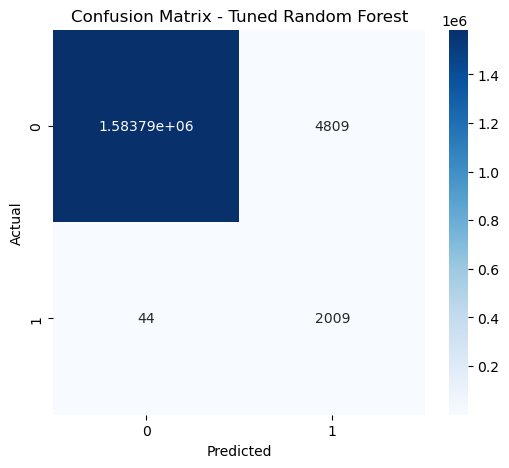

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()


In [ ]:
y_proba = best_rf.predict_proba(X_test)[:, 1]
y_pred_custom = (y_proba >= 0.3).astype(int)  

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[1579209    9393]
 [     20    2033]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1588602
           1       0.18      0.99      0.30      2053

    accuracy                           0.99   1590655
   macro avg       0.59      0.99      0.65   1590655
weighted avg       1.00      0.99      1.00   1590655



In [ ]:
y_proba = best_rf.predict_proba(X_test)[:, 1]
y_pred_custom = (y_proba >= 0.6).astype(int)  

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[1585252    3350]
 [     57    1996]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.37      0.97      0.54      2053

    accuracy                           1.00   1590655
   macro avg       0.69      0.99      0.77   1590655
weighted avg       1.00      1.00      1.00   1590655

